In [1]:
%load_ext autoreload
%autoreload 2

%config IPCompleter.greedy=True

# Stellar mass vs. $v_\text{max}$

First, imports:

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import h5py
from astropy import units
from pathlib import Path
import os

import dataset
import curve_fit

import importlib

In [3]:
importlib.reload(dataset)
importlib.reload(curve_fit)

<module 'curve_fit' from '/home/kassiili/Curvaton_Simulations/practise-with-datasets/curve_fit.py'>

## Get data

Next, I retrieve the data. We are only interested in luminous halos. Also, there might be some spurious cases with odd values of $v_\text{max}$.

In [4]:
# Choose galaxy:
galaxy = 'MW'

if galaxy == 'M31':
    gn=1
else:
    gn=2

In [ ]:
# Satellites and isolated galaxies separated:

# Get LCDM data:
LCDM = dataset.Dataset("V1_LR_fix_127_z000p000", "LCDM")
vmaxSat, vmaxIsol = LCDM.get_subhalos("Vmax",True)
SMSat, SMIsol = LCDM.get_subhalos("Stars/Mass",True)

# Exclude dark halos
maskSat = np.logical_and.reduce((vmaxSat>0, SMSat>0))
maskIsol = np.logical_and.reduce((vmaxIsol>0, SMIsol>0))

# Convert to proper units:
vmaxSat = vmaxSat[maskSat] / 100000 # cm/s to km/s 
vmaxIsol = vmaxIsol[maskIsol] / 100000
SMSat = SMSat[maskSat] * units.g.to(units.Msun)
SMIsol = SMIsol[maskIsol] * units.g.to(units.Msun)

In [6]:
# Only satellites, luminous and dark:

LCDM = dataset.Dataset("CDM_V1_LR_127_z000p000", "LCDM")
vmax = LCDM.get_subhalos("Vmax",True)[0]
SM = LCDM.get_subhalos("Stars/Mass",True)[0]
GNs = LCDM.get_subhalos("GroupNumber",True)[0]
SGNs = LCDM.get_subhalos("SubGroupNumber",True)[0]

# Get the subhalos of the right galaxy:
mask = np.logical_and.reduce((vmax > 0, SGNs != 0, GNs == gn))

# Convert to proper units:
vmax = vmax[mask] / 100000 # cm/s to km/s 
SM = SM[mask] * units.g.to(units.Msun)

# Sort arrays in descending order:
vmax[::-1].sort()

## Plot

In [7]:
# Set some parameters:
x_down = 7; x_up = 100
y_down = 1; y_up = 500

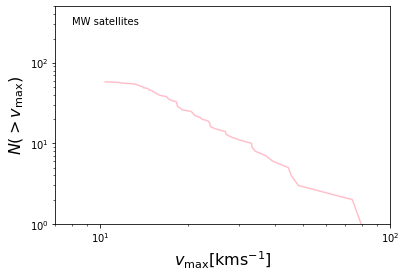

In [8]:
fig, axes = plt.subplots()

# Set axes:
axes.set_xscale('log')
axes.set_yscale('log')
axes.set_xlim(x_down,x_up)
axes.set_ylim(y_down,y_up)

# Set labels:
axes.set_xlabel('$v_{\mathrm{max}}[\mathrm{km s^{-1}}]$', fontsize=16)
axes.set_ylabel('$N(>v_{\mathrm{max}})$', fontsize=16)
#axes.set_title('Stellar mass of satellites')
#axes.text(11, 2*10**9, 'isolated galaxies')
#axes.set_title('Stellar mass of isolated galaxies')

# Galaxy text:
axes.text(8, 300, '{} satellites'.format(galaxy))
#self.axes.set_title('Distribution of satellites as a function of $v_{max}$')

# Set marker styles:
color = {LCDM.name : "pink"}
marker = {LCDM.name : (3,0,0)}

axes.plot(vmax, np.arange(1, vmax.size + 1), c=color[LCDM.name])
       